In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from datetime import datetime

import gmaps

import feather

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

## Loading and preparing the data

In [3]:
stop_events = feather.read_dataframe("../../data_files/B/once/75days/stop_events_with_geo_train_test_averages_prev_next_dwell.feather",
                            columns=["index",
                                     "segment_duration",
                                     'line_distance',
                                     'to_centre_dist',
                                     'direction_degrees',
                                     'rain',
                                     'arrival_hour','arrival_day',
                                     'date','workid',
                                     'actualArrival',
                                     'publicName',
                                     'segment_name',
                                     'dwell_duration_dest',
                                      'dwell_duration_prev',
                                     'timingPoint',
                                     'timetable_segment_duration',
                                     'segment_code',
                                     'mean_durations_by_segment_code',
                                     'patternId'
                                    ])

stop_events = stop_events.set_index(stop_events.columns[0])


In [4]:


stop_events.head(30)

print(stop_events.shape)

stop_events = stop_events.dropna(axis=0)

# # stop_events = stop_events[stop_events.id != "NaN"]

print(stop_events.shape)


(3920087, 19)
(3920087, 19)


In [38]:
def filter_rare(stop_events):

    segment_counts = stop_events.groupby("segment_code").size()

    filtered_stop_events = stop_events.drop(
        stop_events[
            stop_events["segment_code"].isin(
                segment_counts[segment_counts < 120].index.values
            )
        ].index
    )

    return filtered_stop_events

stop_events = filter_rare(stop_events)

In [39]:
np.count_nonzero(stop_events['patternId'].value_counts().sort_values(ascending=False) < 40000)

841

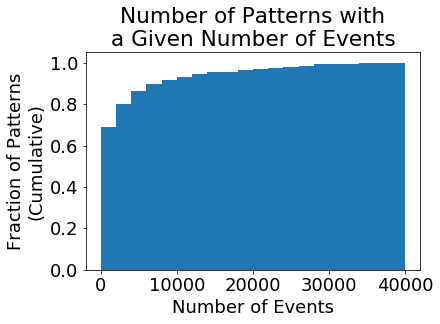

In [7]:
plt.hist(stop_events['patternId'].value_counts(), bins=20, range=(0,40000), cumulative=True, density=True, linewidth=0,rasterized=True);
plt.title("Number of Patterns with\na Given Number of Events")
plt.xlabel("Number of Events")
plt.ylabel("Fraction of Patterns\n(Cumulative)")
plt.savefig("EDA_patterns_given_stop_events.pdf", bbox_inches="tight")

Text(0, 0.5, 'Fraction of all segments (Cumulative)')

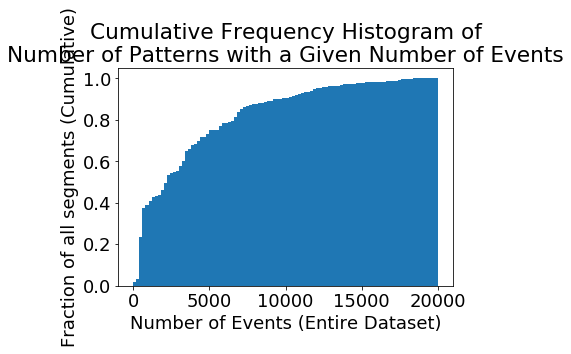

In [6]:
plt.hist(stop_events['segment_name'].value_counts(), bins=100, range=(0,20000), cumulative=True, density=True, linewidth=0,rasterized=True);
plt.title("Cumulative Frequency Histogram of\nNumber of Patterns with a Given Number of Events")
plt.xlabel("Number of Events (Entire Dataset)")
plt.ylabel("Fraction of all segments (Cumulative)")
# plt.savefig("EDA_patterns_given_stop_events.pdf", bbox_inches="tight")

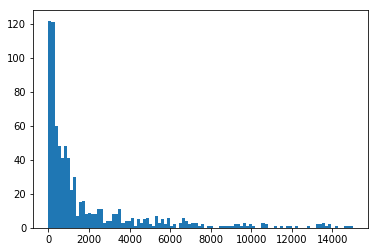

In [28]:
plt.hist(stop_events['patternId'].value_counts(), bins=100, range=(0,15000));

In [9]:
just_segments = stop_events.drop_duplicates(subset=['segment_code'])

In [10]:
just_segments.columns

Index(['date', 'actualArrival', 'workid', 'patternId', 'publicName',
       'timingPoint', 'segment_code', 'segment_name', 'line_distance',
       'to_centre_dist', 'direction_degrees', 'rain', 'dwell_duration_dest',
       'dwell_duration_prev', 'segment_duration', 'timetable_segment_duration',
       'arrival_hour', 'arrival_day', 'mean_durations_by_segment_code'],
      dtype='object')

In [11]:
# plt.hist(just_segments['direction'], bins=100)
# plt.show()

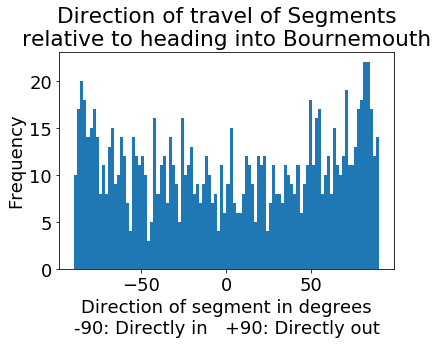

In [15]:
plt.hist(just_segments['direction_degrees'], bins=100)
plt.title("Direction of travel of Segments\nrelative to heading into Bournemouth")
plt.ylabel("Frequency")
plt.xlabel("Direction of segment in degrees\n-90: Directly in   +90: Directly out")
plt.savefig("EDA-Hist_of_direction_degrees.pdf", bbox_inches = "tight")
plt.show()

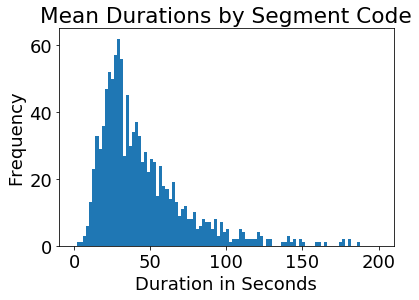

In [17]:
plt.hist(just_segments['mean_durations_by_segment_code'], bins=100, range=(0,200))
plt.title("Mean Durations by Segment Code")
plt.xlabel("Duration in Seconds")
plt.ylabel("Frequency")
plt.savefig("EDA-Hist_of_mean_duration_by_segment_code.pdf", bbox_inches = "tight")
plt.show()

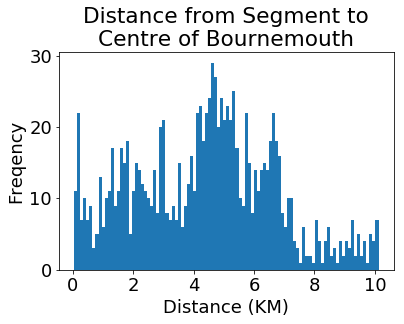

In [20]:
plt.hist(just_segments['to_centre_dist'], bins=100)
plt.title("Distance from Segment to\nCentre of Bournemouth")
plt.xlabel("Distance (KM)")
plt.ylabel("Freqency")
plt.savefig("EDA-Hist_of_dist_from_centre_by_segment_code.pdf", bbox_inches = "tight")
plt.show()

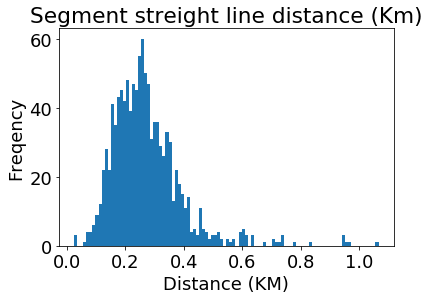

In [21]:
plt.hist(just_segments['line_distance'], bins=100)
plt.title("Segment streight line distance (Km)")
plt.xlabel("Distance (KM)")
plt.ylabel("Freqency")
plt.savefig("EDA-Hist_of_stright_line_dist_by_segment_code.pdf", bbox_inches = "tight")
plt.show()

Text(0, 0.5, 'distance to centre (km)')

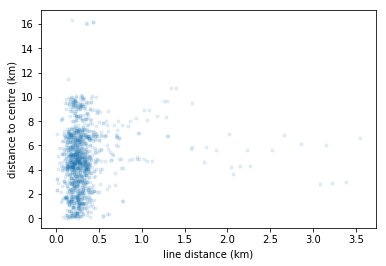

In [11]:
plt.scatter(just_segments['line_distance'], just_segments['to_centre_dist'], alpha=0.1, marker=".")
plt.xlabel("line distance (km)")
plt.ylabel("distance to centre (km)")

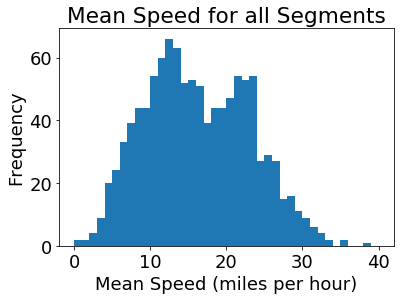

In [23]:
# plt.scatter(just_segments['line_distance'], just_segments['median_durations_by_segment_code'], alpha=0.5, marker=".")
plt.hist(just_segments['line_distance']*1000/just_segments['mean_durations_by_segment_code']*2.23694, bins=40, range=(0,40))
plt.title("Mean Speed for all Segments")
plt.xlabel("Mean Speed (miles per hour)")
plt.ylabel("Frequency");
plt.savefig("EDA-Hist_mean_speed_mph_by_segment_code.pdf", bbox_inches = "tight")



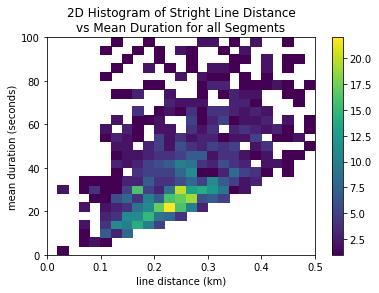

In [40]:
# plt.scatter(just_segments['line_distance'], just_segments['median_durations_by_segment_code'], alpha=0.5, marker=".")
plt.hist2d(just_segments['line_distance'], just_segments['mean_durations_by_segment_code'], bins=[25,25], range=[[0,0.5],[0,100]], cmin=1)
plt.title("2D Histogram of Stright Line Distance\nvs Mean Duration for all Segments")
plt.xlabel("line distance (km)")
plt.ylabel("mean duration (seconds)");
plt.colorbar()
plt.savefig("EDA-Hist2d_of_line_dist_vs_mean_duration_by_segment_code.pdf", bbox_inches = "tight")



Text(0, 0.5, 'direction')

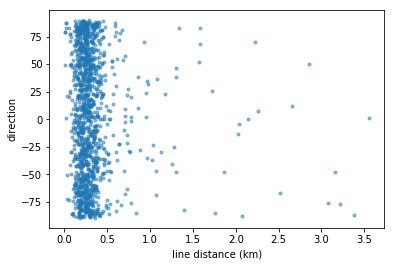

In [19]:
plt.scatter(just_segments['line_distance'], just_segments['direction_degrees'], alpha=0.5, marker=".")
plt.xlabel("line distance (km)")
plt.ylabel("direction")

Text(0, 0.5, 'direction')

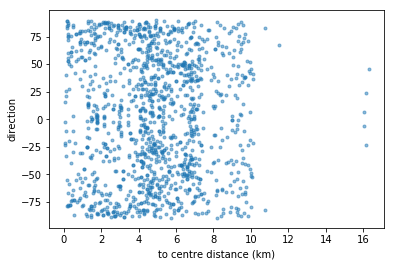

In [20]:
plt.scatter(just_segments['to_centre_dist'], just_segments['direction_degrees'], alpha=0.5, marker=".")
plt.xlabel("to centre distance (km)")
plt.ylabel("direction")

Text(0, 0.5, 'direction')

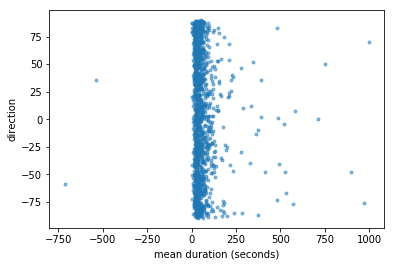

In [21]:
plt.scatter(just_segments['mean_durations_by_segment_code'], just_segments['direction_degrees'], alpha=0.5, marker=".")
plt.xlabel("mean duration (seconds)")
plt.ylabel("direction")

In [16]:
mean_dwell_dest_durations_by_stop_code = (
    stop_events.groupby("stopCode")["dwell_duration_dest"]
    .mean()
    .rename("mean_dwell_dest_durations_by_stop_code")
)
stop_events = stop_events.merge(
    mean_dwell_dest_durations_by_stop_code.to_frame(), "left", on=["stopCode"]
)

Text(0, 0.5, 'mean dwell time')

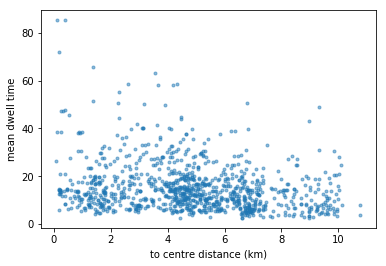

In [17]:
plt.scatter(just_segments[just_segments['timingPoint'] == 0]['to_centre_dist'], just_segments[just_segments['timingPoint'] == 0]['mean_dwell_dest_durations_by_stop_code'], alpha=0.5, marker=".")
plt.xlabel("to centre distance (km)")
plt.ylabel("mean dwell time")


Text(0, 0.5, 'mean dwell time')

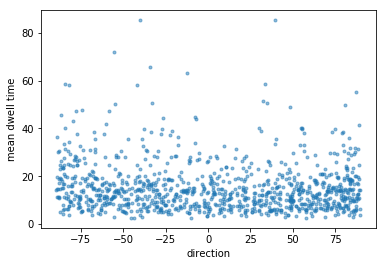

In [22]:
plt.scatter(just_segments[just_segments['timingPoint'] == 0]['direction_degrees'], just_segments[just_segments['timingPoint'] == 0]['mean_dwell_dest_durations_by_stop_code'], alpha=0.5, marker=".")
plt.xlabel("direction")
plt.ylabel("mean dwell time")

In [35]:
just_segments[just_segments['median_durations_by_segment_code'] < 0]['segment_code']

2377354    1200WDX38484_1200DOY29325_0
2377356    1200DOA05885_1200BOB20190_0
Name: segment_code, dtype: object

In [32]:
stop_events[stop_events['segment_code'] == '1200WDX38484_1200DOY29325_0'][['actualArrival','segment_duration']]

,actualArrival,segment_duration
2375267,2018-11-07 08:22:42,-717.0
2428299,2018-11-08 08:21:21,-571.0
2482944,2018-11-09 08:17:37,-394.0
2714865,2018-11-14 08:40:49,-551.0
3334675,2018-11-27 08:33:42,-463.0


In [33]:
stop_events[stop_events['segment_code'] == '1200DOA05885_1200BOB20190_0'][['actualArrival', 'segment_duration']]

,actualArrival,segment_duration
2375269,2018-11-07 08:31:53,-1111.0
2428301,2018-11-08 08:27:59,-597.0
2482946,2018-11-09 08:21:19,-281.0
2714867,2018-11-14 08:46:24,-816.0
3334677,2018-11-27 08:38:41,-770.0


In [48]:
segment_counts = stop_events.groupby('segment_code').size().rename("trip_counts")

just_segments = just_segments.merge(segment_counts.to_frame(), 'left', left_on='segment_code', right_index=True)



In [69]:
just_segments[just_segments['median_durations_by_segment_code'] < 1][['segment_code', 'mean_durations_by_segment_code', 'line_distance', 'trip_counts']]

,segment_code,mean_durations_by_segment_code,line_distance,trip_counts
28202,1290DOB21219_1290BOA05841_0,0.137255,0.008918,153
28410,1290DOB21219_1290BOA05841_1,0.045455,0.008918,44
28474,1290DOB21064_1290BOA05874_1,0.979167,0.015048,48
129238,1280POA11809_1280POA11807_0,27.500000,0.006404,14
145754,1290DOB21064_1290BOA05874_0,0.000000,0.015048,8
622537,1290DOB21140_1290BOA56572_0,0.000000,0.025971,5
808217,1290BOA05968_1290DOB21160_0,5.928571,0.021407,13
2377354,1200WDX38484_1200DOY29325_0,-539.200000,0.299413,5
2377356,1200DOA05885_1200BOB20190_0,-715.000000,0.233063,5


In [73]:
stop_events[stop_events['segment_code'] == '1290DOB21064_1290BOA05874_1'][['actualArrival', 'publicName', 'segment_duration', 'line_distance']]


,actualArrival,publicName,segment_duration,line_distance
28447,2018-09-18 16:23:59,46,0.0,0.015048
77342,2018-09-19 16:25:31,46,0.0,0.015048
128022,2018-09-20 16:23:04,46,0.0,0.015048
178502,2018-09-21 16:25:28,46,0.0,0.015048
320980,2018-09-24 16:41:55,46,0.0,0.015048
343722,2018-09-25 16:19:59,46,0.0,0.015048
420037,2018-09-26 16:18:42,46,0.0,0.015048
472735,2018-09-27 16:22:08,46,0.0,0.015048
525715,2018-09-28 16:37:01,46,0.0,0.015048
652422,2018-10-01 16:26:19,46,27.0,0.015048


In [60]:
stops = pd.read_csv("../Trapeze_Data/Stops.csv")
stops = stops.set_index("stopCode")

In [74]:
# 1290DOB21064_1290BOA05874_1

print(*stops.loc['1290DOB21064'].values)

print(*stops.loc['1290BOA05874'].values)

-1.879359 50.740716
-1.879344 50.740851


In [56]:
from math import radians, degrees, cos, sin, asin, sqrt

# From: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [67]:
haversine(stops.loc['1290BOB20281'].values[0], 
          stops.loc['1290BOB20281'].values[1],
          *stops.loc['1290BOA90841'].values)

0.06494644327738917

In [85]:
np.sort(segment_counts.values)[0:276]

array([ 4,  4,  5,  5,  5,  6,  6,  6,  7,  8,  8,  8,  8,  8,  9, 11, 11,
       12, 12, 13, 13, 14, 14, 14, 15, 15, 16, 20, 20, 20, 21, 21, 22, 23,
       23, 23, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27,
       28, 29, 30, 31, 32, 32, 36, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42,
       42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45,
       45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
       48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49,
       49, 49, 49, 49, 49

(array([792., 192.,  70.,  22.,  19.,   4.,   3.,   1.,   0.,   1.]),
 array([2.00000e+00, 4.32850e+03, 8.65500e+03, 1.29815e+04, 1.73080e+04,
        2.16345e+04, 2.59610e+04, 3.02875e+04, 3.46140e+04, 3.89405e+04,
        4.32670e+04]),
 <a list of 10 Patch objects>)

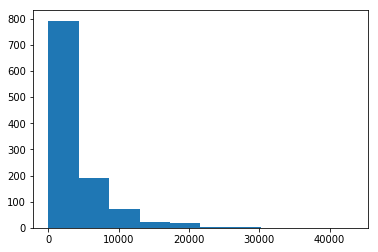

In [49]:
plt.hist(segment_counts.values)